### `Analysis on Fresh Basket (Branch: Shahbaz) : `
                
     "Analyzing customer purchases from an Excel file, including items such as fruits and vegetables, alongside bill         numbers. To enhance the dataset, a new column named 'Week' is derived from the bill numbers, associating each transaction with a specific day of the week from Monday to Sunday. This process is automated through a loop based on the bill numbers, enriching the dataset for further analysis."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import warnings

In [2]:
df = pd.read_csv('Sales Req Data.csv' , encoding = 'latin -1' )
df

,BranchCode,Branch,BarCode,BillNo,Item,Quantity,Rate,NetAmount,BillDate,Location,Category,Customer Number,Customer Name
0,8,Farm Fresh SHAHBAZ,2634,001459/P3,FB Bakes - Chocolate Fudge Brownie,1.0,395.0,395.0,45339,Pantry,Ready to Eat,NaN,NaN
1,8,Farm Fresh SHAHBAZ,67002303966,001460/P3,Pure Protein - Chocolate Deluxe Bar (50g),1.0,595.0,595.0,45339,Pantry,Ready to Eat,NaN,NaN
2,8,Farm Fresh SHAHBAZ,4006067084225,001460/P3,Davidoff - Rich Aroma (100g),1.0,2675.0,2675.0,45339,Tea & Coffee,Coffee,NaN,NaN
3,8,Farm Fresh SHAHBAZ,672201000051,001460/P3,Jacobs - Coffee (100g),1.0,1690.0,1690.0,45339,Tea & Coffee,Coffee,NaN,NaN
4,8,Farm Fresh SHAHBAZ,70,001461/P3,Parsley (local) - 30 gm,1.0,120.0,120.0,45345,Vegetables,Local Vegetables,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28402,8,Farm Fresh SHAHBAZ,2562,131870/PO,FB Bakes - Multigrain Loaf,1.0,450.0,450.0,45351,Pantry,Bakery,3.475806e+09,M Sajid
28403,8,Farm Fresh SHAHBAZ,905,131872/PO,Baby Spinach (100g)-Feroz Farm,1.0,175.0,175.0,45351,Vegetables,Local Vegetables,3.332059e+09,Asma Adnan
28404,8,Farm Fresh SHAHBAZ,1392,131872/PO,Fresh Cut - Coleslaw,1.0,175.0,175.0,45351,Fresh Cut,Fresh Cut Vegetable,3.332059e+09,Asma Adnan
28405,8,Farm Fresh SHAHBAZ,649,131874/PO,Emma - Silky Strawberry Yogurt (with chia seeds),1.0,560.0,560.0,45351,Milk Dairy and Cheese,Greek Yogurt,NaN,NaN


In [3]:
df.columns

Index(['BranchCode', 'Branch', 'BarCode', 'BillNo', 'Item', 'Quantity', 'Rate',
       'NetAmount', 'BillDate', 'Location', 'Category', 'Customer Number ',
       'Customer Name'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28407 entries, 0 to 28406
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BranchCode        28407 non-null  int64  
 1   Branch            28407 non-null  object 
 2   BarCode           28407 non-null  int64  
 3   BillNo            28407 non-null  object 
 4   Item              28407 non-null  object 
 5   Quantity          28407 non-null  float64
 6   Rate              28407 non-null  float64
 7   NetAmount         28407 non-null  float64
 8   BillDate          28407 non-null  int64  
 9   Location          28407 non-null  object 
 10  Category          28403 non-null  object 
 11  Customer Number   14845 non-null  float64
 12  Customer Name     14815 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 2.8+ MB


In [5]:
df.shape

(28407, 13)

In [6]:
df.isnull().sum()

BranchCode              0
Branch                  0
BarCode                 0
BillNo                  0
Item                    0
Quantity                0
Rate                    0
NetAmount               0
BillDate                0
Location                0
Category                4
Customer Number     13562
Customer Name       13592
dtype: int64

In [7]:
# 'BillDate' number indicate the day
df['BillDate'].value_counts().sort_index()

45323     909
45324     643
45325     966
45326     940
45327    1005
45328    1102
45329    1202
45330     704
45331     937
45332    1094
45333     961
45334    1165
45335     912
45336    1057
45337     876
45338     813
45339    1232
45340    1100
45341    1106
45342     897
45343     881
45344     927
45345     719
45346    1243
45347    1220
45348    1170
45349     886
45350     894
45351     846
Name: BillDate, dtype: int64

### `Make a Column of Week:`

    "In our dataset, while 'Week' information is absent, we leverage the 'BillDate' column's sequential order to infer weekly cycles, with each sequence of seven consecutive dates representing a recurring Monday-to-Sunday week cycle. This approach allows us to effectively delineate time periods and analyze data within weekly intervals, facilitating insightful temporal analyses despite the absence of explicit 'Week' designations."

In [8]:
# Calculate the starting day of the week
start_day = 'Mon'  # Assuming the week starts on Monday

# Define a mapping of days of the week
days_of_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Calculate the starting index of the week cycle
start_day_index = days_of_week.index(start_day)

# Calculate the length of the week cycle
cycle_length = len(days_of_week)

# Define a function to map Bill_Number values to the corresponding day of the week
def map_bill_number_to_week(bill_number):
    day_index = (bill_number - df['BillDate'].min()) % cycle_length
    return days_of_week[(start_day_index + day_index) % cycle_length]

# Add the 'Week' column to the DataFrame
df['Week'] = df['BillDate'].apply(map_bill_number_to_week)

df

,BranchCode,Branch,BarCode,BillNo,Item,Quantity,Rate,NetAmount,BillDate,Location,Category,Customer Number,Customer Name,Week
0,8,Farm Fresh SHAHBAZ,2634,001459/P3,FB Bakes - Chocolate Fudge Brownie,1.0,395.0,395.0,45339,Pantry,Ready to Eat,NaN,NaN,Wed
1,8,Farm Fresh SHAHBAZ,67002303966,001460/P3,Pure Protein - Chocolate Deluxe Bar (50g),1.0,595.0,595.0,45339,Pantry,Ready to Eat,NaN,NaN,Wed
2,8,Farm Fresh SHAHBAZ,4006067084225,001460/P3,Davidoff - Rich Aroma (100g),1.0,2675.0,2675.0,45339,Tea & Coffee,Coffee,NaN,NaN,Wed
3,8,Farm Fresh SHAHBAZ,672201000051,001460/P3,Jacobs - Coffee (100g),1.0,1690.0,1690.0,45339,Tea & Coffee,Coffee,NaN,NaN,Wed
4,8,Farm Fresh SHAHBAZ,70,001461/P3,Parsley (local) - 30 gm,1.0,120.0,120.0,45345,Vegetables,Local Vegetables,NaN,NaN,Tues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28402,8,Farm Fresh SHAHBAZ,2562,131870/PO,FB Bakes - Multigrain Loaf,1.0,450.0,450.0,45351,Pantry,Bakery,3.475806e+09,M Sajid,Mon
28403,8,Farm Fresh SHAHBAZ,905,131872/PO,Baby Spinach (100g)-Feroz Farm,1.0,175.0,175.0,45351,Vegetables,Local Vegetables,3.332059e+09,Asma Adnan,Mon
28404,8,Farm Fresh SHAHBAZ,1392,131872/PO,Fresh Cut - Coleslaw,1.0,175.0,175.0,45351,Fresh Cut,Fresh Cut Vegetable,3.332059e+09,Asma Adnan,Mon
28405,8,Farm Fresh SHAHBAZ,649,131874/PO,Emma - Silky Strawberry Yogurt (with chia seeds),1.0,560.0,560.0,45351,Milk Dairy and Cheese,Greek Yogurt,NaN,NaN,Mon


In [9]:
df['Week'].value_counts()

Wed      4535
Fri      4446
Mon      4262
Thurs    4221
Sun      4034
Sat      3797
Tues     3112
Name: Week, dtype: int64

In [10]:
df_week =df[['Week']]
df_week

,Week
0,Wed
1,Wed
2,Wed
3,Wed
4,Tues
...,...
28402,Mon
28403,Mon
28404,Mon
28405,Mon


In [11]:
df['Week'].value_counts()

Wed      4535
Fri      4446
Mon      4262
Thurs    4221
Sun      4034
Sat      3797
Tues     3112
Name: Week, dtype: int64

### ` Visualize which day is more Items purchases, Make a Pie :`
    
    "Visualizing the distribution of item purchases across different days of the week to identify peak shopping days. This is depicted in a pie chart, offering insights into the comparative frequency of purchases throughout the week."

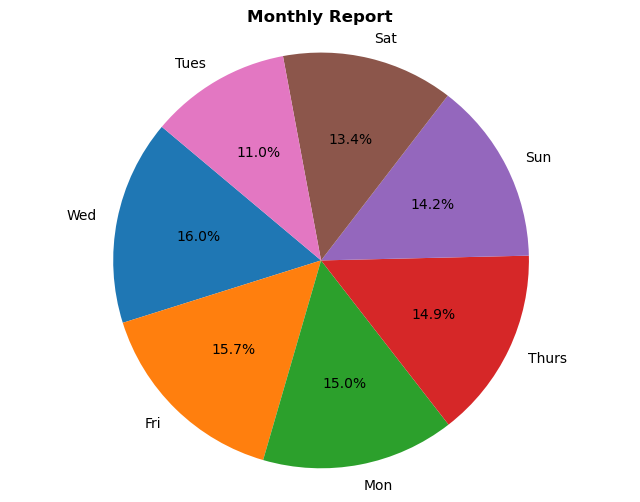

In this Mart, people purchased more things(Items) in Wed > Fri > Mon > Thurs >Sun > Sat > Tues
Image saved successfully as image.png


<Figure size 640x480 with 0 Axes>

In [14]:
day_counts = df['Week'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Monthly Report', fontweight='bold')  # Make the title bold
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print('In this Mart, people purchased more things(Items) in Wed > Fri > Mon > Thurs >Sun > Sat > Tues')

# Save the plot as an image
plt.savefig("image.png")

print("Image saved successfully as image.png")

In [ ]:
# Pie - Chart Create

plt.figure(figsize = (6,6))

#make pie , % decide , colors decide

plt.pie(day_counts , labels= day_counts.index , autopct = '%1.1f%%' \
        , colors = ['skyblue' , 'lightcoral' , 'lightgreen', 'lightsalmon' , 'lightblue'])
# title
plt.title('More Items Purchase in a Day' , fontsize =14)

plt.axis('equal')
plt.tight_layout()
plt.show()

plt.show()


print("In this Mart, people purchased more things in **Wed > Fri > Mon > Thurs > Sun > Sat > Tues**")


### `Make a Line Graph: `
 
    "Through meticulous analysis, it becomes evident that our sales peak mid-week, with Wednesday boasting the highest volume of items sold, closely followed by Friday. This trend underscores the importance of optimizing stock levels and promotional efforts during these critical days to maximize revenue potential."

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('updated_file.csv')

# Define the order of days
days_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Count occurrences of each day of the week
day_counts = df['Week'].value_counts().reindex(days_order)

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', color='b')
plt.title('Purchase Trend Throughout the Month', fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Items Purchases in this Day')
plt.grid(True)
plt.show()

plt.savefig('Purchase_Trend_Throughout_the_Month.jpg')

In [ ]:
df['Item'].value_counts()

In [ ]:
# There are 1827 items in Column "Item" 
#Then I find Top 50 items which are selling 
df['Item'].value_counts().head(50)

In [ ]:
#I need that result how many Items are only Sell 1 Time

# Find items sold only once
items_sold_once = df['Item'].value_counts()[df['Item'].value_counts() == 1]

# Display items sold only once
print("Items sold only once:")
print(items_sold_once)


In [ ]:
#There are 385 Items are sold in once


items_sold_once.head(50)

### `Find out which Day have highesr in Sales:`
### ` Make a Pie Chart:`

    "After analyzing the sales data, it's evident that 'Day of the Week' stands out with the highest total sales, showcasing its significance as a key revenue-generating day in our business operations."


In [ ]:
# Group by 'Week' and sum 'NetAmount' for each day of the week, then sort in descending order
total_amount_per_day = df.groupby('Week')['NetAmount'].sum().sort_values(ascending=False)

# Display total amount for each day of the week in descending order
print("Total amount for each day of the week (descending order)('Amount is in PKR'):")
print(total_amount_per_day)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the columns 'Week' and 'NetAmount'

# Group by 'Week' and sum 'NetAmount' for each day of the week, then sort in descending order
total_amount_per_day = df.groupby('Week')['NetAmount'].sum().sort_values(ascending=False)

# Plotting the pie graph
plt.figure(figsize=(8, 8))
total_amount_per_day.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Sales for Each Days of the Month')
plt.ylabel('')  # Remove y-axis label
plt.show()

plt.savefig('Proportion_of_Total_Sales_for_Each_Days_of_the_Month.jpg')

In [ ]:
total_amount = df['NetAmount'].sum()

# Display total amount
print("Total amount in the 'NetAmount' column:", total_amount)

### `Make a Bar Graph:`

    "The analysis clearly indicates that our highest sales occur on Thurday, highlighting the significance of mid-week shopping trends in our sales strategy."

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Read the CSV file
df = pd.read_csv('updated_file.csv')

# Group by 'Week' and sum 'NetAmount' for each day of the week, then sort in descending order
total_amount_per_day = df.groupby('Week')['NetAmount'].sum().sort_values(ascending=False)

# Highlight the highest value
max_value = total_amount_per_day.max()
highlight_color = ['blue' if val == max_value else 'gray' for val in total_amount_per_day]

# Define a function to format y-axis labels
def millions_formatter(x, pos):
    return '{:.1f}M'.format(x/1e6)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(total_amount_per_day.index, total_amount_per_day.values, color=highlight_color)

# Adding text annotations to each bar
for bar, amount in zip(bars, total_amount_per_day.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{amount/1e6:.2f}M', 
             ha='center', va='bottom')

plt.title('Total Amount for Each Day of the Month')
plt.xlabel('Week Days')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)

# Apply custom formatter to y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

plt.savefig('Total_Amount_for_Each_Day_of_the_Month.jpg')

In [ ]:
# Which location Items are more selling or running items

df['Location'].value_counts()

In [ ]:
# IN Column 'Location' which have Juices so all that rows will print
df[df['Location'] == 'Juices']

###  `Percentage of Each Quantity Sales in Location:`
### `Contribution find out using Bar Graph:`
    "To provide deeper insights, the bar graph illustrates the contribution of each category in this column,represented as a percentage. This visual representation allows for a clear understanding of the distribution of contributions within the dataset."

In [ ]:
# Calculate the percentage of each location
location_percentage = df['Location'].value_counts(normalize=True) * 100

# Plotting the bar graph
plt.figure(figsize=(10, 6))
location_percentage.plot(kind='bar', color='skyblue')

# Adding percentage labels on the bars
for i, percentage in enumerate(location_percentage):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')

plt.title('Percentage of Each Quantity Sales in Location')
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

plt.savefig('Percentage_of_Each_Quantity_Sales_in_Location.jpg')

###  `Proportion of NetAmount by Location:`
### `Contribution find out using Bar Graph:`
    "To provide deeper insights, the bar graph illustrates the contribution of each category in this column,represented as a percentage. This visual representation allows for a clear understanding of the distribution of contributions within the dataset."

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the columns 'Location' and 'NetAmount'

# Group by 'Location' and sum the 'NetAmount' for each location
location_net_amount = df.groupby('Location')['NetAmount'].sum()

# Calculate the total sum of 'NetAmount'
total_net_amount = location_net_amount.sum()

# Calculate the proportion of 'NetAmount' for each location as a percentage
proportion_percentage = (location_net_amount / total_net_amount) * 100

# Sort the locations based on the proportion of 'NetAmount' in descending order
proportion_percentage_sorted = proportion_percentage.sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_plot = proportion_percentage_sorted.plot(kind='bar')
plt.title('Proportion of NetAmount by Location')
plt.xlabel('Location')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add percentage values on each bar
for index, value in enumerate(proportion_percentage_sorted):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')
    
# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

plt.savefig('Proportion_of_NetAmount_by_Location.jpg')

### `'Location/Category' have higher 'NetAmount' in 'Items':`
    "After conducting an in-depth analysis of our dataset, it's evident that certain 'Item' entries stand out due to their significantly higher 'Net Amount' values, suggesting notable areas of expenditure or revenue generation deserving further investigation and strategic consideration."

In [ ]:
location = df['Location'].unique()
location

In [ ]:
import pandas as pd

item_location = pd.Series()
net_amount_location = pd.Series()

for i in location:  # Assuming 'location' is a list of locations
    df_location = df[df['Location'] == i]  # Filter DataFrame for each location
    df_location = df_location.sort_values('NetAmount', ascending=False)  # Sort by NetAmount descending
    if not df_location.empty:  # Check if DataFrame is not empty after filtering
        highest_row = df_location.iloc[0]  # Get the row with the highest NetAmount
        item = highest_row['Item']  # Get the item with the highest NetAmount
        net_amount = highest_row['NetAmount']  # Get the NetAmount value
        item_location[i] = item  # Assign the item to the Series
        net_amount_location[i] = net_amount  # Assign the NetAmount to the Series

# If you want to drop missing values from the Series:
item_location = item_location.dropna()
net_amount_location = net_amount_location.dropna()

print("Highest NetAmount Items:")
print(item_location)
print("\nCorresponding NetAmounts:")
print(net_amount_location)


### `'Location/Category' have higher 'Rate' in 'Items':`

    "After conducting an in-depth analysis of our dataset, it's evident that certain 'Item' entries stand out due to their significantly higher 'Rate' values, suggesting notable areas of expenditure or revenue generation deserving further investigation and strategic consideration."

In [ ]:
import pandas as pd

item_location = pd.Series(dtype='object')
rate_location = pd.Series(dtype='float64')

for i in location:  # Assuming 'location' is a list of locations
    df_location = df[df['Location'] == i]  # Filter DataFrame for each location
    df_location = df_location.sort_values('Rate', ascending=False)  # Sort by Rate descending
    if not df_location.empty:  # Check if DataFrame is not empty after filtering
        highest_row = df_location.iloc[0]  # Get the row with the highest Rate
        item = highest_row['Item']  # Get the item with the highest Rate
        rate = highest_row['Rate']  # Get the highest Rate
        item_location[i] = item  # Assign the item to the Series
        rate_location[i] = rate  # Assign the Rate to the Series

# If you want to drop missing values from the Series:
item_location = item_location.dropna()
rate_location = rate_location.dropna()

print("Highest Rate Items:")
print(item_location)
print("\nCorresponding Rates:")
print(rate_location)


### `Missing Values in Customer Number and Name:`

    'This realization holds pivotal implications, particularly in campaign planning and customer engagement strategies. The absence of customer numbers not only signifies potential loss in tracking customer interactions but also highlights the necessity for targeted initiatives.'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'Customer Number' column

# Calculate the percentage of missing values in the 'Customer Number' column
missing_percentage = df['Customer Number '].isnull().mean() * 100
non_missing_percentage = 100 - missing_percentage

# Create a pie chart
labels = ['Missing', 'Non-Missing']
sizes = [missing_percentage, non_missing_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the missing slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Missing Values in Customer Number Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

plt.savefig('Missing_Values_in_Customer_Number.jpg')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'Customer Number' column

# Calculate the percentage of missing values in the 'Customer Number' column
missing_percentage = df['Customer Name'].isnull().mean() * 100
non_missing_percentage = 100 - missing_percentage

# Create a pie chart
labels = ['Missing', 'Non-Missing']
sizes = [missing_percentage, non_missing_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the missing slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Missing Values in Customer Name Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

plt.savefig('Missing_Values_in_Customer_Name.jpg')

### ` Word Cloud:`

    "Through a WordCloud visualization of the 'Location' column, key geographical insights emerge, shedding light on prominent locations within the dataset. This concise representation aids in identifying focal points for further analysis and strategic decision-making."

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('updated_file.csv')  # Replace 'your_file.csv' with the path to your CSV file

# Combine all locations into a single string
text = ' '.join(df['Location'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Locations')
plt.axis('off')
plt.show()

plt.savefig('WordCloud_of_Locations.jpg')

### `Recommendation System:`

    "Upon entering a location value present in the 'Location' column, this recommendation system swiftly identifies and returns the top 5 most frequently occurring in 'Item' listed in the 'Item' column, aiding in pinpointing the prominent areas associated with the specified location."

In [ ]:
# Recommendation System, when you buy anything you want another thing is best/good, ptint top 5 items of any 'Location'

# Function to recommend sub-items for a given location
def recommend_items(location, df):
    sub_item = df[df['Location'] == location]['Item'].value_counts().head(5)
    return list(sub_item.index)

# Test the recommendation system for 'Location'
location = 'Pantry'
recommended_items = recommend_items(location, df)
print(f"Top Selling Items in {location}: {recommended_items}")

In [ ]:
# Recommendation System, when you buy anything you want another thing is best/good, ptint top 5 items of any 'Location'

# Function to recommend sub-items for a given location
def recommend_items(location, df):
    sub_item = df[df['Location'] == location]['Item'].value_counts().head(5)
    return list(sub_item.index)

# Test the recommendation system for 'Location'
location = 'Fruits'
recommended_items = recommend_items(location, df)
print(f"Top Selling Items in {location}: {recommended_items}")


In [ ]:
# Test the recommendation system for 'Location'
location = 'Vegetables'
recommended_items = recommend_items(location, df)
print(f"Top Selling Items in {location}: {recommended_items}")

### `Conclusion:`
### `Final Analysis on this report`:

* In our dataset, while 'Week' information is absent, we leverage the 'BillDate' column's sequential order to infer weekly cycles, with each sequence of seven consecutive dates representing a recurring Monday-to-Sunday week cycle. This approach allows us to effectively delineate time periods and analyze data within weekly intervals, facilitating insightful temporal analyses despite the absence of explicit 'Week' designations.


* In this Mart, people purchased more things (Qunatity wise not in Sales wise)  in Wed > Fri > Mon > Thurs >Sun > Sat > Tues'.


* Highest sales in these days Thurs > Fri > Wed > Mon > Sun > Sat > Tues.


* The analysis clearly indicates that our highest sales occur on Thurday, highlighting the significance of mid-week shopping trends in our sales strategy.


* Within the 'Item' column, our dataset reveals a diverse range of 1827 unique items. However, a noteworthy finding emerges as 385 items were sold only once. This observation underscores the importance of evaluating product performance and customer demand to streamline inventory management and optimize sales strategies.


* Total Amount Collect in SHEHBAZ Branch, in the 'NetAmount' column: 21503424.01 = 21.503 Million (PKR).


* In our dataset, the 'Location' column showcases a clear trend where 'Vegetable' items dominate in terms of Quantity, followed closely by 'Fruits' , 'Pantry' items and so on.


* In our sales dataset, the analysis reveals a clear hierarchy in terms of 'NetAmount' proportion by 'Location,' with the Pantry category leading the sales, followed by Dry Fruits, Fruits, and Vegetables, among others.


* Missing Values in Customer Number and Name: By scrutinizing our dataset, we uncover that a significant portion of customer numbers, approximately 48.7%, is missing. This realization holds pivotal implications, particularly in campaign planning and customer engagement strategies. The absence of customer numbers not only signifies potential loss in tracking customer interactions but also highlights the necessity for targeted. 


* Recommendation System is added,when we put any value of ' Location ' then we will see top 5 items are mostly sales.